In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [2]:
tips = pd.read_csv('tips.csv')

In [3]:
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
tips['sex'] = tips['sex'].astype('category')

In [9]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker          object
day             object
time            object
size             int64
dtype: object

In [10]:
tips['smoker'] = tips['smoker'].astype('category')
tips['time'] = tips['time'].astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day             object
time          category
size             int64
dtype: object

In [11]:
print(tips.shape)

(244, 7)


In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.duplicated().sum()

1

In [14]:
tips.drop_duplicates(inplace = True)
print(tips.duplicated().sum())
print(tips.shape)

0
(243, 7)


In [15]:
tips_num = tips.select_dtypes(include = ['float64', 'int64'])
tips_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [16]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


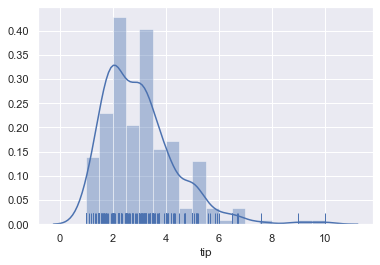

In [17]:
p = sns.distplot(tips['tip'], kde=True, rug=True)

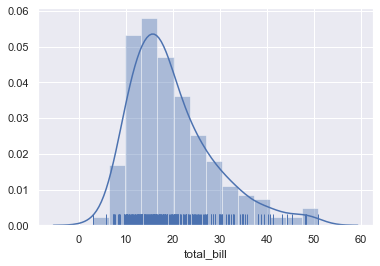

In [18]:
p = sns.distplot(tips['total_bill'], kde=True, rug=True)

In [19]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


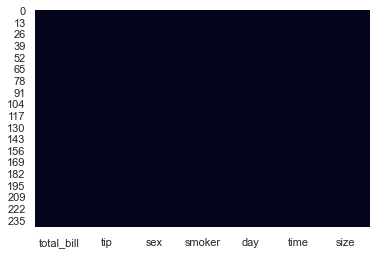

In [20]:
sns.heatmap(tips.isnull(), cbar=False)

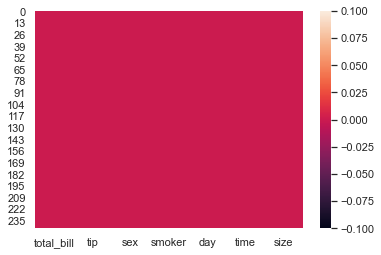

In [21]:
sns.heatmap(tips.isnull(), cbar=True)

In [22]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
55,19.49,3.51,Male,No,Sun,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2
85,34.83,5.17,Female,No,Thur,Lunch,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2
243,18.78,3.00,Female,No,Thur,Dinner,2
154,19.77,2.00,Male,No,Sun,Dinner,4
236,12.60,1.00,Male,Yes,Sat,Dinner,2
110,14.00,3.00,Male,No,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2


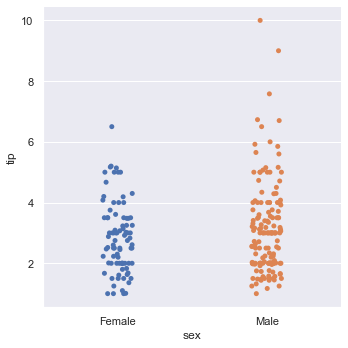

In [23]:
p= sns.catplot(x="sex", y="tip", data=tips)

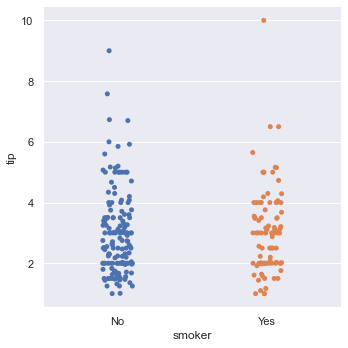

In [24]:
p= sns.catplot(x="smoker", y="tip", data=tips)

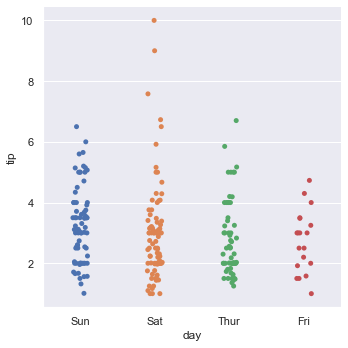

In [25]:
p= sns.catplot(x="day", y="tip", data=tips)

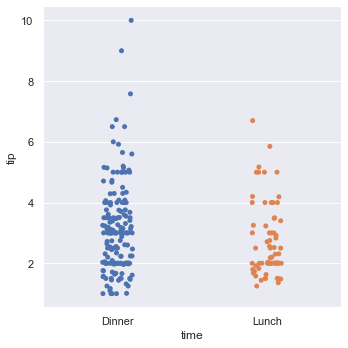

In [26]:
p= sns.catplot(x="time", y="tip", data=tips)

In [27]:
tips.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [28]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


In [29]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


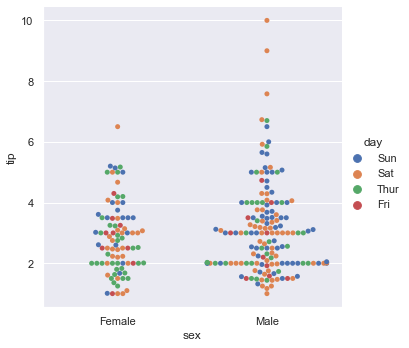

In [30]:
p= sns.catplot(x="sex", y="tip", hue="day", kind="swarm", data=tips)

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


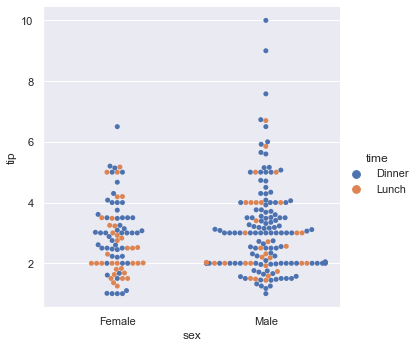

In [32]:
p= sns.catplot(x="sex", y="tip", hue="time", kind="swarm", data=tips) 
#keliatannya dinner yg ngasi tips bykan male

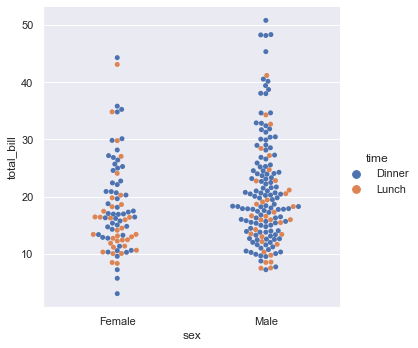

In [33]:
p= sns.catplot(x="sex", y="total_bill", hue="time", kind="swarm", data=tips) 

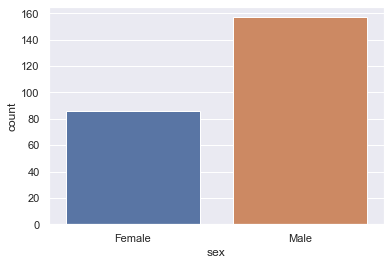

In [34]:
p = sns.countplot(x="sex", data=tips) #bykan male 

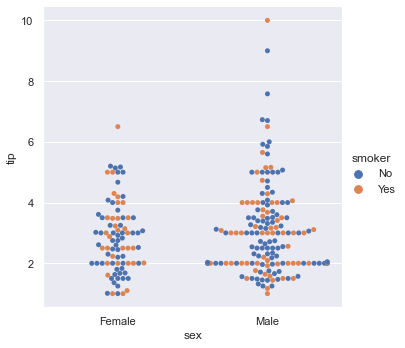

In [35]:
p= sns.catplot(x="sex", y="tip", hue="smoker", kind="swarm", data=tips)

In [36]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    object  
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 20.5+ KB


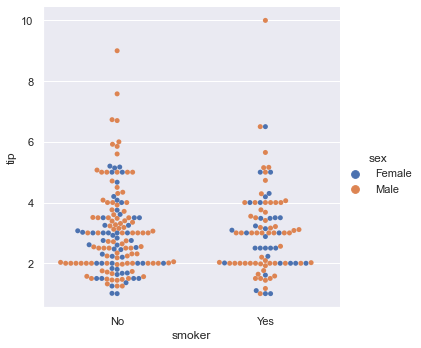

In [37]:
p= sns.catplot(x="smoker", y="tip", hue="sex", kind="swarm", data=tips)

In [38]:
tips.sample(20)

,total_bill,tip,sex,smoker,day,time,size
201,12.74,2.01,Female,Yes,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
146,18.64,1.36,Female,No,Thur,Lunch,3
74,14.73,2.20,Female,No,Sat,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
111,7.25,1.00,Female,No,Sat,Dinner,1
228,13.28,2.72,Male,No,Sat,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
64,17.59,2.64,Male,No,Sat,Dinner,3
